In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

e:\conda\env\lamanv\project1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Carregando os dados
data = pd.read_csv('E:\git\PERSONAL\POSTECH\FASE2\TECH-CHALLENGE\DadosIbovespa.csv')
data


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,24.01.2024,127.816,128.275,129.446,127.680,"8,82M","-0,35%"
1,23.01.2024,128.263,126.612,128.331,126.612,"9,37M","1,31%"
2,22.01.2024,126.602,127.636,127.843,126.118,"9,51M","-0,81%"
3,19.01.2024,127.636,127.319,127.820,126.533,"11,96M","0,25%"
4,18.01.2024,127.316,128.524,129.047,127.316,"12,46M","-0,94%"
...,...,...,...,...,...,...,...
1006,08.01.2020,116.247,116.667,117.335,115.693,"5,91M","-0,36%"
1007,07.01.2020,116.662,116.872,117.076,115.965,"4,85M","-0,18%"
1008,06.01.2020,116.878,117.707,117.707,116.269,"6,57M","-0,70%"
1009,03.01.2020,117.707,118.564,118.792,117.341,"6,83M","-0,73%"


01:54:37 - cmdstanpy - INFO - Chain [1] start processing
01:54:39 - cmdstanpy - INFO - Chain [1] done processing
e:\conda\env\lamanv\project1\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\conda\env\lamanv\project1\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


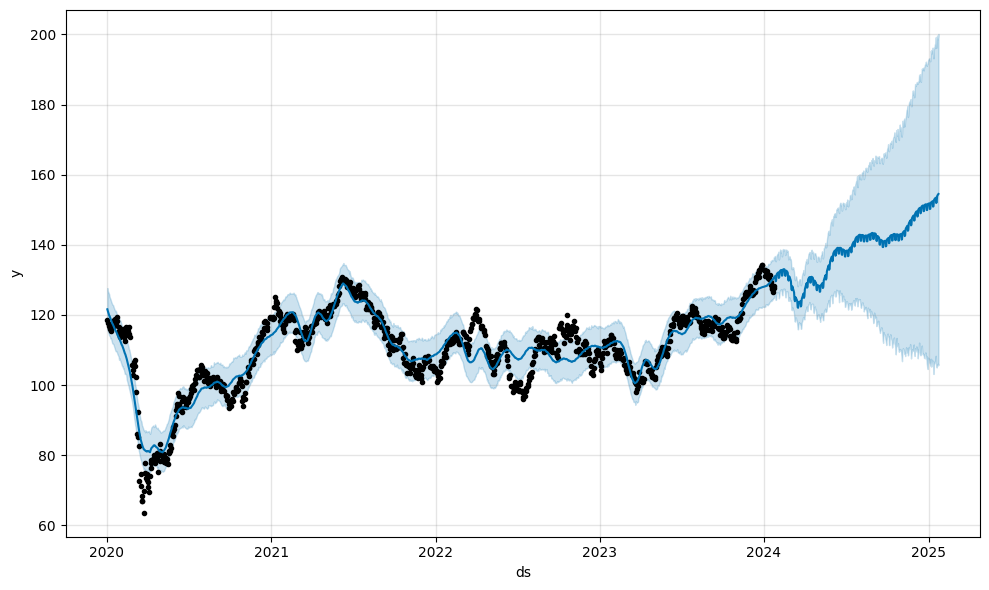

In [10]:
# Convertendo as colunas relevantes
data['Data'] = pd.to_datetime(data['Data'], format='%d.%m.%Y')

# Renomeando as colunas conforme o esperado pelo Prophet
data = data.rename(columns={'Data': 'ds', 'Último': 'y'})

# Criando e treinando o modelo
model = Prophet()
model.fit(data)

# Criando um DataFrame com datas futuras para prever
future = model.make_future_dataframe(periods=365)  # Estendendo o período em 365 dias

# Fazendo previsões
forecast = model.predict(future)

# Visualizando as previsões
fig = model.plot(forecast)
plt.show()